**Название проекта**

Рынок заведений общественного питания Москвы
_____
**Описание исследования.**

Мы решили открыть небольшое кафе в Москве. Гостей в нем должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами было решено обратиться к инвесторам. Их интересует текущее положение дел на рынке — сохранится ли популярность кафе на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Партнёры просят подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.
_____
**Цель исследования.**

Определить характеристики и расположение наиболее успешных заведений общественного питания.
_____
**Задачи исследования.**
* исследовать виды общественного питания
* исследовать сетевые и несетевые заведения
* исследовать характерное число посадочных мест для заведений
* исследовать расположения заведений, выявить закономерности
* подготовить презентацию
_____
**Исходные данные.**
 
Файл rest_data.csv:
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

Файл mosgaz-streets.csv:
* streetname - названия улиц
* areaid - идентификатор района
* okrug - аббревиатура округа
* area - название района

______

**Данное исследование разделим на несколько частей:**

* [Изучение общей информации и предобработка данных](#main_info)
* [Предобработка данных](#prep)
* [Анализ данных](#analyzing)
* [Вывод](#summary)

<a id='main_info'></a>
# 1. Изучение общей информации и предобработка данных

В данном шаге
* подключим библиотеки и параметры отображения данных 
* откроем и изучим файлы, необходимые для работы
* приведем данные к нужным типам, проверим и исправим дубликаты, приопуски в данных

### Подключим библиотеки и параметры отображения данных 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_colwidth', 0)

### Откроем и изучим файлы, необходимые для работы

In [4]:
data = pd.read_csv('rest_data.csv') # данные о заведениях
streets_areas_url='https://drive.google.com/file/d/1ys6pP_0hGIXGYRJMppE0zr8TSJ7zL6qb/view?usp=sharing'
streets_areas = pd.read_csv('https://drive.google.com/uc?id=' + streets_areas_url.split('/')[-2])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [3]:
streets_areas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   streetname  4398 non-null   object
 1   areaid      4398 non-null   int64 
 2   okrug       4398 non-null   object
 3   area        4398 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


In [4]:
display('Данные о заведениях', data.head())

'Данные о заведениях'

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
display('Данные об улицах по районам', streets_areas.head())

'Данные об улицах по районам'

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Ознакомимся с данными немного поближе: выведем уникальные значения по всем столбцам, посмотрим есть ли очевидные аномалии

In [6]:
# выведем уникальные значения по всем столбцам - посмотрим есть ли очевидные аномалии
def show_data_values(data):
    for col in data.columns:    
        try:
            values = sorted(data[col].unique())
            # если больше 10 значений, выведем только первые и последние 5
            if len(values) > 10:
                display (col, values[:5], values[-5:])
            else: display(col, values)
        except:
            display(f'После except: {col}', data[col].unique()) 
            
            
show_data_values(data)

'id'

[838, 5882, 19613, 19618, 19619]

[223435, 223436, 223437, 223438, 223439]

'object_name'

['1-ЫЙ МОСКОВСКИЙ КАДЕТСКИЙ КОРПУС',
 '1-й МОК',
 '100 личная столовая',
 '100 личное кафе',
 '1001 ночь']

['школа 476', 'школа 772', 'школа 775', 'школа 913', 'школа 919']

'chain'

['да', 'нет']

'object_type'

['бар',
 'буфет',
 'закусочная',
 'кафе',
 'кафетерий',
 'магазин (отдел кулинарии)',
 'предприятие быстрого обслуживания',
 'ресторан',
 'столовая']

'address'

['1-й Нагатинский проезд, дом 10',
 '1-я Тверская-Ямская улица, дом 29/66, корпус 1',
 '2-я Брестская улица, дом 1, строение 1',
 '2-я Брестская улица, дом 5, строение 1',
 '5-й Котельнический переулок, дом 11']

['улица Ленинская Слобода, дом 26, строение 5',
 'улица Льва Толстого, дом 18',
 'улица Миклухо-Маклая, дом 18',
 'улица Обручева, дом 23, строение 1',
 'улица Сергея Макеева, дом 9, строение 2']

'number'

[0, 1, 2, 3, 4]

[1200, 1288, 1400, 1500, 1700]

***Вывод:*** 
* В колонке chain всего два вида значений, тип нужно поменять на bool.
* В колонке 'number' есть нулевые значения

Остальные данные при беглом осмотре в порядке.


<a id='prep'></a>
# 2. Предобработка данных

### Приведем данные к нужным типам, проверим и исправим дубликаты, приопуски в данных

Заменим тип колонки 'chain' на bool

In [7]:
data.loc[data['chain'] == "нет",'chain'] = ''
data['chain'] = data['chain'].astype('bool')

Теперь посмотрим дубликаты. Проверим записи на идентичность без столбеца 'id'.

In [8]:
print('Дубликатов в таблице:', data.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number']).sum())

Дубликатов в таблице: 82


Такие дубликаты есть, уберем их

In [9]:
data = data[data.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number']) == False]

Проверим явные пропуски

In [10]:
print('Явные пропуски в таблице:\n', data.isna().sum())

Явные пропуски в таблице:
 id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64


***Вывод по шагу:***
Библиотеки подключили, данные прочитали, с информацией ознакомились, типы данных исправили, дубликаты удалили, пропуски проверили

<a id='analyzing'></a>
## 3. Анализ данных

На этом шаге:
 * Исследуем соотношение видов объектов общественного питания по количеству. Построим график.
 * Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.
 * Узнаем что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест
 * Опишем среднее количество посадочных мест для каждого вида общественного питания
 * Построим график топ-10 улиц по количеству объектов общественного питания. Посмотрим в каких районах Москвы находятся эти улицы
 *  Найдем число улиц с одним объектом общественного питания. Посмотрим в каких районах Москвы находятся эти улицы
 * Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания


### Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

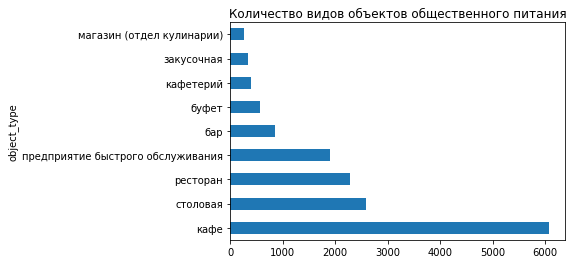

In [11]:
ax = data['object_type'].value_counts().plot\
    .barh(title="Количество видов объектов общественного питания")
ax.set_ylabel('object_type');

***Вывод:*** Больше всего распространены кафе, более чем в 2 раза реже - столовые, сразу за ней идут рестораны и предприятия быстрого обслуживания. Самую меньшую часть занимают магазины с отделом кулинарии, закусочные и кафетерии

### Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

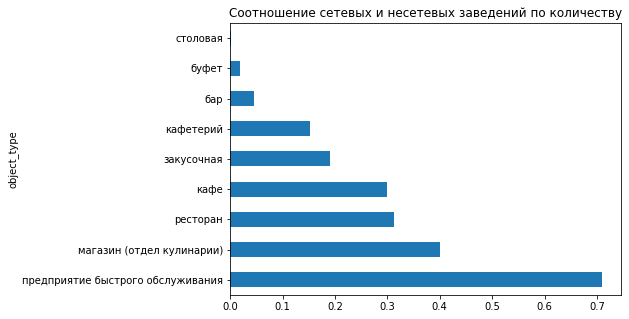

In [12]:
plt.figure(figsize=(7,5))
ratio_chain_to_nonchain = data.query('chain == True').groupby('object_type')['id'].count() /\
                         data.query('chain == False').groupby('object_type')['id'].count()

ratio_chain_to_nonchain.sort_values(ascending=False).plot\
                        .barh(title="Соотношение сетевых и несетевых заведений по количеству");

***Вывод:***
* сетевых заведений любых типов определенно меньше чем сетевых, так как соотношение везде меньше 1
* столовые, буфеты и бары практически не бывают сетевыми
* чаще всего сетевыми бывают предприятия быстрого обслуживания и магазины с отделом кулинарии
* кафе в этом рейтинге примерно по середине с соотношением в 30%

### Узнаем что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест

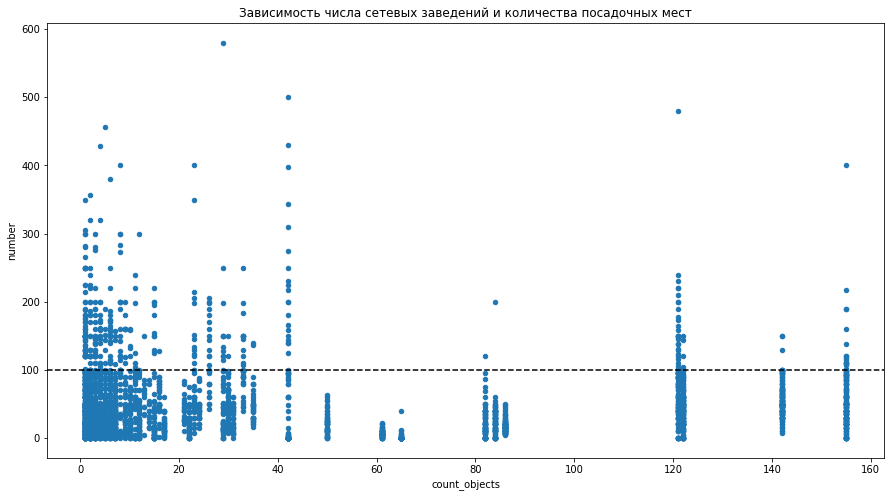

In [13]:
data['count_objects'] = data.groupby('object_name')["id"].transform('count')
#data['median_number'] = data.groupby('object_name')["number"].transform('median')
data.query('chain == True').plot(x='count_objects', y = 'number', kind='scatter',\
     figsize=(15,8), title="Зависимость числа сетевых заведений и количества посадочных мест");
plt.axhline(y=100, color='black', linestyle='--');

***Вывод:*** Похоже, что наибольше распространение получили заведения с количеством объектов в сети до 17 и с количеством посадочных мест не больше 100. Делаем вывод, что для сетевых заведений характерно много заведений с небольшим числом посадочных мест в каждом.

### Опишем среднее количество посадочных мест для каждого вида общественного питания

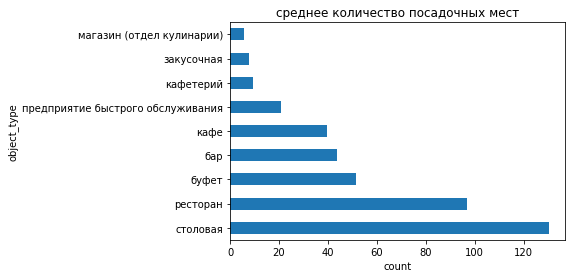

In [14]:
ax = data.groupby('object_type')["number"].mean()\
                .sort_values(ascending=False)\
                .plot(kind='barh', title= "среднее количество посадочных мест");
ax.set_xlabel('count')
ax.set_ylabel('object_type');

***Вывод:*** Больше всего посадочных мест в столовых и ресторанах, далее с небеольшой разницей между собой идут буфет, бар и кафе. Меньше всего магазины с отделом кулинарии, закусочные и кафетерии. Картина очень похожа на распространенность видов общественного питания, если не учитывать кафе. Тут кафе на средней позиции.

### Построим график топ-10 улиц по количеству объектов общественного питания. Посмотрим в каких районах Москвы находятся эти улицы

Выделим в отдельный столбец информацию об улице из столбца address. 

In [15]:
# функция для выделения улицы из целого адреса
def get_street_from_address(address):
    # делим адрес на части, выделяем часть с улицей по ключевым словам
    addr_parts = address.split(',') 
    for addr_part in addr_parts:
        for key_word in ['улица', 'проспект', 'бульвар', 'переулок', 'ул.']:
            if key_word in addr_part:
                return addr_part.strip()
    # если нет совпадений по ключевым словам возвращаем если есть 2-ю часть из адреса, либо весь адрес
    if len(addr_parts) > 1: return addr_parts[1].strip()
    return address            

In [16]:
data['streetname'] = data['address'].apply(get_street_from_address)
data['streetname'].head()

0    улица Егора Абакумова
1    улица Талалихина     
2    Абельмановская улица 
3    Абрамцевская улица   
4    Абрамцевская улица   
Name: streetname, dtype: object

Теперь совместим основную таблицу и таблицу с данными об улицах и районах

In [17]:
streets_areas = streets_areas.groupby('streetname').first()
data = data.merge(streets_areas, on="streetname", how='left')
data.head(3)

,id,object_name,chain,object_type,address,number,count_objects,streetname,areaid,okrug,area
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,1,улица Егора Абакумова,86.00,СВАО,Ярославский Район
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,1,улица Талалихина,18.00,ЦАО,Таганский район
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,1,Абельмановская улица,18.00,ЦАО,Таганский район


Построим график топ-10 улиц по количеству объектов общественного питания

Топ-10 улиц по количеству объектов общественного питания
 streetname
проспект Мира             204
город Зеленоград          194
Профсоюзная улица         182
Ленинградский проспект    172
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        148
проспект Вернадского      128
Кутузовский проспект      114
Каширское шоссе           111
Name: object_name, dtype: int64


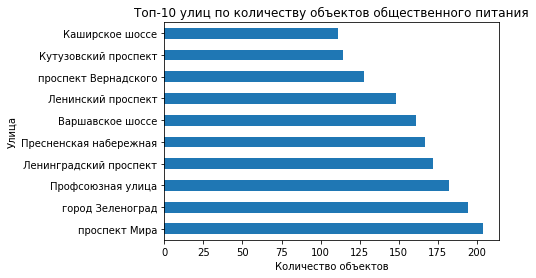

In [18]:
top10_street = data.groupby('streetname')['object_name'].count()\
        .sort_values(ascending=False).head(10)

print("Топ-10 улиц по количеству объектов общественного питания\n", top10_street)
ax = top10_street.plot(kind='barh', title="Топ-10 улиц по количеству объектов общественного питания")
ax.set_xlabel('Количество объектов') 
ax.set_ylabel('Улица');


Районы в которых находятся топ 10 улиц, у которых больше всего заведений

In [19]:
display('Районы в которых находятся топ 10 улиц, у которых больше всего заведений')

data[data['streetname'].isin(top10_street.index)]\
    .groupby('area').agg({'streetname':['first', 'count']})

'Районы в которых находятся топ 10 улиц, у которых больше всего заведений'

streetname      
                                              first count
area                                                     
Академический район          Профсоюзная улица       182 
Алексеевский район           проспект Мира           204 
Пресненский район            Пресненская набережная  167 
Район Аэропорт               Ленинградский проспект  172 
Район Дорогомилово           Кутузовский проспект    114 
Район Крюково                город Зеленоград        194 
Район Москворечье-Сабурово   Каширское шоссе         111 
Район Проспект Вернадского   проспект Вернадского    276 
Район Чертаново Центральное  Варшавское шоссе        161

Посмотрим теперь визуально, в где находятся эти улицы, отметим их на карте

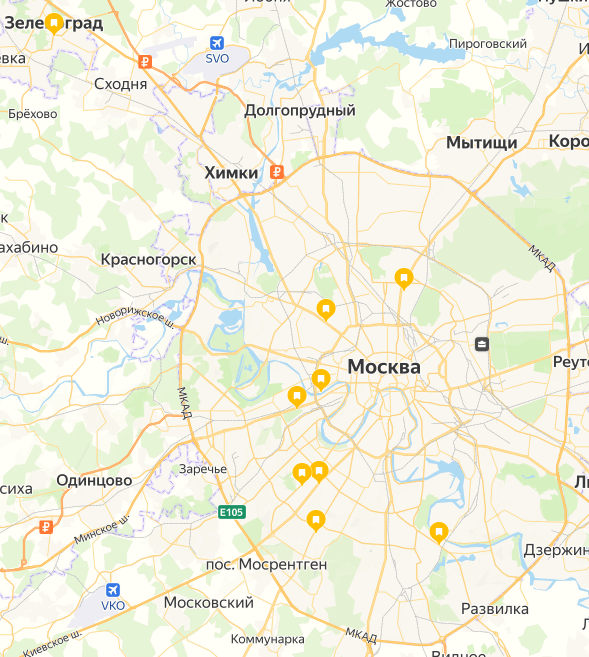

***Вывод:*** Как видим основная часть густых на заведения улиц находится в западных и юго-западных районах внутри МКАДа, а также в Зеленограде. Топовые районы у которых больше всего заведений: Проспект Вернадского, Алексеевский, Крюково, Академический, Аэропорт, Пресненский, Чертаново Центральное, Дорогомилово, Москворечье-Сабурово

### Найдем число улиц с одним объектом общественного питания. Посмотрим в каких районах Москвы находятся эти улицы

In [20]:
#table = data.groupby('streetname').agg({'object_name':['count'], 'area_x' : ['first']}).reset_index()  
#table[table['object_name'] == 1]

streets_with_one_obj = data.groupby('streetname')['object_name'].count()

streets_with_one_obj = data[data['streetname']\
    .isin(streets_with_one_obj[streets_with_one_obj == 1].index)].reset_index(drop=True)

top_areas_of_one_obj_streets = streets_with_one_obj\
    .pivot_table(values=['streetname','okrug'], index='area',\
    aggfunc={'streetname':'count',  'okrug':'first'})\
    .sort_values(by='streetname', ascending=False).head(10)

top_areas_of_one_obj_streets.columns = {'okrug', 'streets_count'}

display('Топ 10 районов с улицами, имеющими всего один объект общественного питания',\
        top_areas_of_one_obj_streets )

'Топ 10 районов с улицами, имеющими всего один объект общественного питания'

,okrug,streets_count
area,,
Таганский район,ЦАО,26
Басманный район,ЦАО,24
Район Хамовники,ЦАО,22
Тверской район,ЦАО,20
Пресненский район,ЦАО,20
Район Марьина роща,СВАО,17
Район Сокольники,ВАО,15
Район Арбат,ЦАО,14
Район Замоскворечье,ЦАО,14


Посмотрим как они расположены на карте

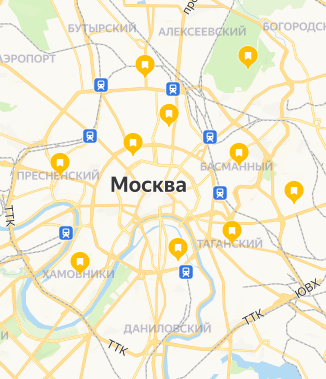

***Вывод:*** Основные районы, имеющие всего один объект общественного питания: Таганский, Басманный, Хамовники, Тверской, Пресненский, Марьина роща, Сокольники, Арбат, Замоскворечье, Мещанский район. Отобранные районы располагаются в основном в северном, восточном и совсем немного в западном направлениях.
В сравнении с улицами богатыми на количество заведений, видим, что тут в основном занимается другая часть Москвы.

### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

'Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания'

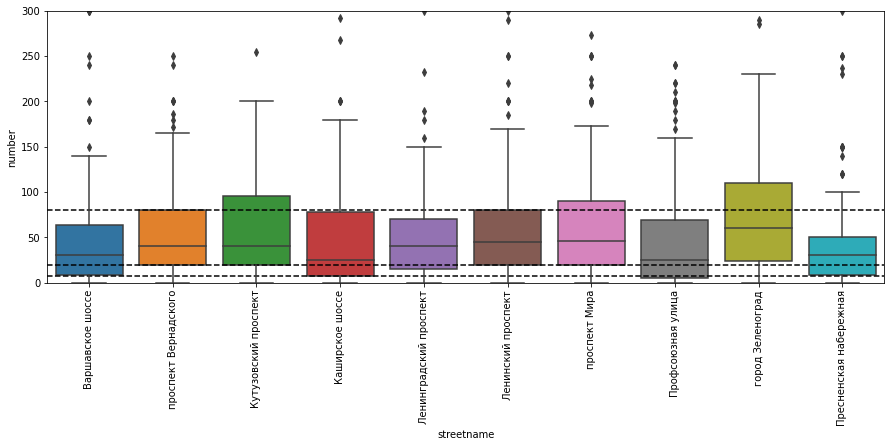

In [21]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.axis(["1", "2",0, 300]) 
plt.axhline(y=20, color='black', linestyle='--'); 
plt.axhline(y=7, color='black', linestyle='--'); 
plt.axhline(y=80, color='black', linestyle='--'); 

display('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')
sb.boxplot(x='streetname', y='number',\
           data=data[data['streetname'].isin(top10_street.index)]);

***Вывод:*** Обнаруживаются следующие закономерности:
* на проспектах: Вернадского, Кутузовском Ленинском, Мира и Зеленограде минимальное число в основной массе посадочных мест начинается от 20 и выше.
* на Варшавском и Каширском шоссе, и Пресненской набережной нижний порог основной массы от 7 мест. Возможно, по данному параметру для нас эти районы приоритетны, так как планируется небольшое кафе.
* самый большой диапазон посадочных мест в Зеленограде, Кутузовском проспекте. Каширском шоссе, Проспекте Мира
* количество от 35 до 45 посадочных мест везде актуально


***Вывод по шагу:*** Были проанализированы разные виды заведений видов общественного питания: соотношение видов объектов общественного питания по количеству, сетевые/несетевые заведения, посадочные места в них, распространение заведений по районам Москвы

<a id='summary'></a>
## 4. Вывод

Выпишем промежуточные выводы, сделанные на предыдущих шагах:
* больше всего распространены кафе, более чем в 2 раза реже - столовые, сразу за ними идут рестораны и предприятия быстрого обслуживания. Самую меньшую часть занимают магазины с отделом кулинарии, закусочные и кафетерии
* соотношение сетевых и несетевых заведений по количеству:
    * сетевых заведений любых типов определенно меньше чем сетевых, так как соотношение везде меньше 1
    * столовые, буфеты и бары практически не бывают сетевыми
    * чаще всего сетевыми бывают предприятия быстрого обслуживания и магазины с отделом кулинарии
    * кафе в этом рейтинге примерно по середине с соотношением в 30%
* Похоже, что наибольше распространение получили заведения с количеством объектов в сети до 17 и с количеством посадочных мест не больше 100. Делаем вывод, что для сетевых заведений характерно много заведений с небольшим числом посадочных мест в каждом.
* больше всего посадочных мест в столовых и ресторанах, далее с небольшой разницей между собой идут буфет, бар и кафе. Меньше всего магазины с отделом кулинарии, закусочные и кафетерии. Картина очень похожа на распространенность видов общественного питания, если не учитывать кафе. Тут кафе на средней позиции.
* основная чась густых на заведения улиц находится в западных и юго-западных районах внутри МКАДа, а также в Зеленограде. Топовые районы у которых больше всего заведений: Проспект Вернадского, Алексеевский, Крюково, Академический, Аэропорт, Пресненский, Чертаново Центральное, Дорогомилово, Москворечье-Сабурово
* Основные районы, имеющие всего один объект общественного питания: Таганский, Басманный, Хамовники, Тверской, Пресненский, Марьина роща, Сокольники, Арбат, Замоскворечье, Мещанский район. Отобранные районы располагаются в основном в северном, восточном и совсем немного в западном направлениях. В сравнении с улицами богатыми на количество заведений, видим, что тут в основном занимается другая часть Москвы.
* распределение количества посадочных мест для улиц с большим количеством объектов общественного питания:
    * на проспекте Вернадского, Кутузовском, Ленинском, Мира и в Зеленограде минимальное число в основной массе посадочных мест начинается от 20 и выше
    * на Варшавском и Каширском шоссе, и Пресненской набережной нижний порог основной массы от 7 мест. Возможно, по данному параметру для нас эти районы приоритетны, так как планируется небольшое кафе.
    * самый большой диапазон посадочных мест в Зеленограде, Кутузовском просепекте. Каширском шоссе, Проспекте Мира
    * количество от 35 до 45 посадочных мест везде актуально

**Подытожим выводы:**
- несетевых заведений общественного питания любых типов определенно больше чем сетевых. Поэтому очень желательно заложиться на сетевое распространение.
- количество посадочных мест сделать от 7 до 45. Нам интересен нижний порог, поэтому особенно стоит присмотреться к местам на Варшавском шоссе, Каширском шоссе, и Пресненской набережной
- кафе распространены больше всего, значит будет большая конкуренция и нужно искать районы, где она наименьшая. А это в основном правое полушарие Москвы или такие районы как Таганский, Басманный, Хамовники, Тверской, Пресненский, Марьина роща, Сокольники, Арбат, Замоскворечье, Мещанский район.

**Презентация:** https://drive.google.com/file/d/1JV3xWR6NGqOazWwhW8h4Qlm6C5OmQ_zr/view?usp=sharing
